[View in Colaboratory](https://colab.research.google.com/github/ameasure/try_git/blob/master/NNet%20Demo.ipynb)

In [1]:
import tensorflow
import keras

Using TensorFlow backend.


In [2]:
!pip install tables

    100% |████████████████████████████████| 3.8MB 948kB/s 
    100% |████████████████████████████████| 163kB 26.4MB/s 


In [3]:
tensorflow.__version__

'1.11.0-rc1'

In [4]:
keras.__version__

'2.1.6'

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelBinarizer

from keras.models import Model
from keras.layers import Dense, Input, Dropout
from keras.optimizers import Adam

import pandas as pd

# read in our training data
df_train = pd.read_hdf('msha_2010-2011.h5')
# read in our validation data
df_valid = pd.read_hdf('msha_2012.h5')

# create bag of words features
vectorizer = CountVectorizer()
vectorizer.fit(df_train['NARRATIVE'])
X_train = vectorizer.transform(df_train['NARRATIVE'])
X_valid = vectorizer.transform(df_valid['NARRATIVE'])

# keras only accepts a one-hot encoding of the training labels
# we do that here
label_encoder = LabelBinarizer().fit(df_train['INJ_BODY_PART'])
y_train = label_encoder.transform(df_train['INJ_BODY_PART'])
y_valid = label_encoder.transform(df_valid['INJ_BODY_PART'])

# specify the shape of our model, specifically the number of
# features will be equal to however many features are created by our
# vectorizer (i.e. X_train.shape[1])
text_input = Input(shape=(X_train.shape[1],))
# the first layer will take as input our raw features
# it will consist of 100 artificial neurons, each with a relu activation
layer1 = Dense(units=100, activation='relu')(text_input)
# the next layer will take as input the outputs from layer 1
# it will produce a softmax output for the number of classes
output = Dense(units=len(label_encoder.classes_), activation='softmax')(layer1)
# specify the inputs and outputs of our model
# input is the raw text features
# output is the predicted probabilities
model = Model(inputs=[text_input], outputs=[output])
# specify the algorithm for calculating weights 'adam'
# specify the loss function 'categorical_crossentropy'
# specify the validation metrics we will calculate after each epoch
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 11915)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               1191600   
_________________________________________________________________
dense_2 (Dense)              (None, 46)                4646      
Total params: 1,196,246
Trainable params: 1,196,246
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.fit(x=X_train, y=y_train,
          validation_data=(X_valid, y_valid),
          batch_size=32, epochs=5)

Train on 18681 samples, validate on 9032 samples
Epoch 1/5
18681/18681 [==============================] - 8s 426us/step - loss: 1.6640 - acc: 0.6196 - val_loss: 1.0061 - val_acc: 0.7541
Epoch 2/5
18681/18681 [==============================] - 7s 367us/step - loss: 0.7142 - acc: 0.8228 - val_loss: 0.8858 - val_acc: 0.7682
Epoch 3/5
18681/18681 [==============================] - 7s 366us/step - loss: 0.4409 - acc: 0.8890 - val_loss: 0.8868 - val_acc: 0.7667
Epoch 4/5
18681/18681 [==============================] - 7s 365us/step - loss: 0.2929 - acc: 0.9302 - val_loss: 0.9349 - val_acc: 0.7568
Epoch 5/5
18681/18681 [==============================] - 7s 365us/step - loss: 0.2033 - acc: 0.9537 - val_loss: 1.0044 - val_acc: 0.7478


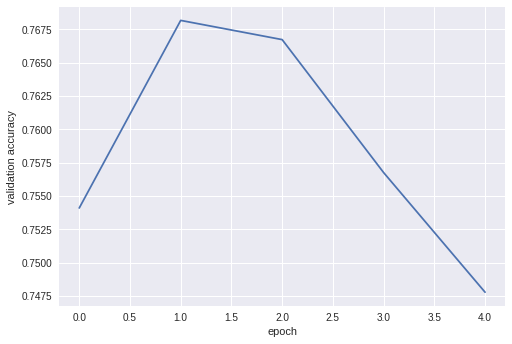

In [12]:
from matplotlib import pyplot as plt

plt.xlabel('epoch')
plt.ylabel('validation accuracy')
plt.plot(model.history.history['val_acc'])

In [13]:
text_input = Input(shape=(X_train.shape[1],))
layer1 = Dense(units=100, activation='relu')(text_input)
dropout = Dropout(0.5)(layer1)
output = Dense(units=len(label_encoder.classes_), activation='softmax')(dropout)
# specify the inputs and outputs of our model
# input is the raw text features
# output is the predicted probabilities
do_model = Model(inputs=[text_input], outputs=[output])
# specify the algorithm for calculating weights 'adam'
# specify the loss function 'categorical_crossentropy'
# specify the validation metrics we will calculate after each epoch
do_model.compile(optimizer='adam', 
                loss='categorical_crossentropy', 
                metrics=['accuracy'])
do_model.fit(x=X_train, y=y_train,
            validation_data=(X_valid, y_valid),
            batch_size=32, epochs=5)

Train on 18681 samples, validate on 9032 samples
Epoch 1/5
18681/18681 [==============================] - 7s 398us/step - loss: 1.9874 - acc: 0.5432 - val_loss: 1.1919 - val_acc: 0.7281
Epoch 2/5
18681/18681 [==============================] - 7s 384us/step - loss: 1.0528 - acc: 0.7477 - val_loss: 0.9296 - val_acc: 0.7638
Epoch 3/5
18681/18681 [==============================] - 7s 383us/step - loss: 0.7730 - acc: 0.8063 - val_loss: 0.8653 - val_acc: 0.7685
Epoch 4/5
18681/18681 [==============================] - 7s 387us/step - loss: 0.6111 - acc: 0.8426 - val_loss: 0.8533 - val_acc: 0.7726
Epoch 5/5
18681/18681 [==============================] - 7s 380us/step - loss: 0.5014 - acc: 0.8686 - val_loss: 0.8627 - val_acc: 0.7717


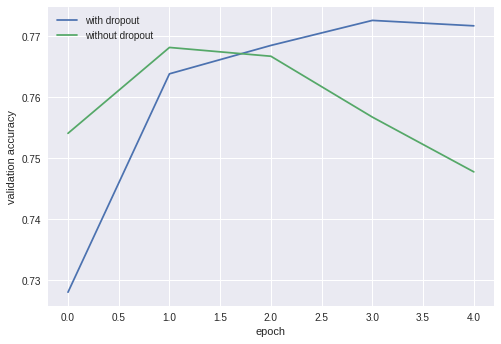

In [14]:
plt.ylabel('validation accuracy')
plt.xlabel('epoch')
plt.plot(do_model.history.history['val_acc'], label='with dropout')
plt.plot(model.history.history['val_acc'], label='without dropout')
plt.legend()

In [15]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_train['NARRATIVE'])
X_train_seq = tokenizer.texts_to_sequences(df_train['NARRATIVE'])
X_valid_seq = tokenizer.texts_to_sequences(df_valid['NARRATIVE'])
print(X_train_seq[0])

[244, 29, 7152, 1570, 764, 213, 970, 4, 3198, 139, 5, 1924, 424, 223, 610, 1, 764, 29, 10, 1, 1570, 9, 3, 64, 2, 490, 110, 5, 213, 1, 764, 813, 4, 164, 317, 11, 6, 15, 54]


In [0]:
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Concatenate
from keras.preprocessing import sequence

X_train_seq = sequence.pad_sequences(X_train_seq, maxlen=200)
X_valid_seq = sequence.pad_sequences(X_valid_seq, maxlen=200)

input_text = Input(shape=(200,), dtype='int32')
embedding = Embedding(len(tokenizer.word_index), 
                          300, 
                          input_length=200)(input_text)
dropout = Dropout(0.1)(embedding)
convolution = Conv1D(filters=100, 
                     kernel_size=3,
                     padding='valid',
                     strides=1,
                     activation='relu')(dropout)
pool = GlobalMaxPooling1D()(convolution)
dense = Dense(100, activation='relu')(pool)
dropout = Dropout(0.5)(dense)
output = Dense(len(label_encoder.classes_), activation='softmax')(dense)

conv_model = Model(inputs=input_text, outputs=output)

conv_model.compile(optimizer='adam', 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])


In [24]:
conv_model.fit(x=X_train_seq, y=y_train,
               validation_data=(X_valid_seq, y_valid),
               batch_size=256, epochs=5)

Train on 18681 samples, validate on 9032 samples
Epoch 1/5
18681/18681 [==============================] - 4s 238us/step - loss: 0.3430 - acc: 0.9076 - val_loss: 0.8128 - val_acc: 0.7905
Epoch 2/5
18681/18681 [==============================] - 4s 227us/step - loss: 0.2807 - acc: 0.9268 - val_loss: 0.8358 - val_acc: 0.7882
Epoch 3/5
18681/18681 [==============================] - 4s 230us/step - loss: 0.2280 - acc: 0.9436 - val_loss: 0.8782 - val_acc: 0.7845
Epoch 4/5
18681/18681 [==============================] - 4s 229us/step - loss: 0.1815 - acc: 0.9572 - val_loss: 0.9203 - val_acc: 0.7799
Epoch 5/5
18681/18681 [==============================] - 4s 229us/step - loss: 0.1441 - acc: 0.9677 - val_loss: 0.9542 - val_acc: 0.7827


In [0]:
input_text = Input(shape=(200,), dtype='int32')
embedding = Embedding(len(tokenizer.word_index), 
                          300, 
                          input_length=200)(input_text)
dropout = Dropout(0.1)(embedding)
pooled_convolutions = []
for kernel_size in [2, 3, 4, 5]:
    convolution = Conv1D(filters=20, 
                         kernel_size=kernel_size,
                         padding='valid',
                         strides=1,
                         activation='relu')(dropout)
    pool = GlobalMaxPooling1D()(convolution)
    pooled_convolutions.append(pool)
concatenated = Concatenate()(pooled_convolutions)
dropout = Dropout(0.5)(concatenated)
dense = Dense(100, activation='relu')(dropout)
dropout = Dropout(0.5)(dense)
output = Dense(len(label_encoder.classes_), activation='softmax')(dense)

conv_model = Model(inputs=input_text, outputs=output)

conv_model.compile(optimizer='adam', 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])


In [0]:
conv_model.fit(x=X_train_seq, y=y_train,
               validation_data=(X_valid_seq, y_valid),
               batch_size=128, epochs=5)

Train on 18681 samples, validate on 9032 samples
Epoch 1/5
18681/18681 [==============================] - 8s 442us/step - loss: 2.5917 - acc: 0.3496 - val_loss: 1.5503 - val_acc: 0.6172
Epoch 2/5
18681/18681 [==============================] - 7s 376us/step - loss: 1.4726 - acc: 0.6367 - val_loss: 1.0354 - val_acc: 0.7407
Epoch 3/5
18681/18681 [==============================] - 7s 377us/step - loss: 1.1278 - acc: 0.7174 - val_loss: 0.8805 - val_acc: 0.7700
Epoch 4/5
18560/18681 [============================>.] - ETA: 0s - loss: 0.9576 - acc: 0.7573